<a href="https://colab.research.google.com/github/thomascourtney/Scoring-rates/blob/main/td_coding_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#libraries
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [4]:
#loading csv file from directory
df = pd.read_csv("/content/mv_test.csv")
#Adding a column for the mean between score1 and score2
df["mean"] = df[["score1","score2"]].mean(axis=1)
df

,ID,bad,score1,score2,mean
0,A00000052226,1,428,584,506.0
1,A00000050031,1,435,689,562.0
2,A00000057573,1,437,644,540.5
3,A00000033767,1,438,645,541.5
4,A00000021091,1,439,638,538.5
...,...,...,...,...,...
70984,A00000045477,0,862,912,887.0
70985,A00000031849,0,862,921,891.5
70986,A00000024835,0,862,922,892.0
70987,A00000031397,0,862,923,892.5


Question 1

In [38]:
#Creating small function to calculating divergence score
def calculate_divergence(df: pd.DataFrame):
    mu_good, sigma_good = df.loc[df['bad'] == 0, 'score1'].mean(), df.loc[df['bad'] == 0, 'mean'].std()
    mu_bad, sigma_bad = df.loc[df['bad'] == 1, 'mean'].mean(), df.loc[df['bad'] == 1, 'mean'].std()
    print(2*(mu_good - mu_bad)**2/(sigma_good**2 + sigma_bad**2))

In [39]:
calculate_divergence(df)


2.1639867074343764


Question 2

In [40]:
def create_table(df, starting_bin, ending_bin, bin_increment, score=str, total_number=str, bad_number=str):
  df = pd.DataFrame({total_number: df[score],
                        bad_number: df["bad"]})

  my_list = []
  my_list.append(0)
  for i in range(starting_bin, ending_bin, bin_increment):
    my_list.append(i)
  my_list.append(np.inf)

  result = df.groupby(pd.cut(df[total_number], my_list, right=False)).apply(lambda x: pd.Series({
      total_number: x[total_number].count(),
      bad_number: x[bad_number].astype(bool).sum(),
  }))

  return result


In [44]:
  # concatenate the dataframes horizontally
  df_concat = pd.concat([create_table(df, 575, 850, 50, "score1", 'Total # (S1)', 'Bads # (S1)'), create_table(df, 575, 850, 50, "score2", 'Total # (S2)', 'Bads # (S2)')], axis=1)
  df_concat
  # reset the index
  #df_concat = df_concat.reset_index()

  # rename the columns
  #df_concat.columns = ['Score Band', 'Total # (S1)', 'Bads # (S1)', 'Total # (S2)', 'Bads # (S2)']

  #Reshaping columns and adding bad rate for each score
  #df_concat.set_index("Score Band", inplace=True)
  #df_concat['Bad Rate (S1)'], df_concat['Bad Rate (S2)'] = df_concat['Bads # (S1)'] / df_concat['Total # (S1)'], df_concat['Bads # (S2)'] / df_concat['Total # (S2)']
  #bad1_col = df_concat.pop('Bad Rate (S1)')
  #df_concat.insert(2, 'Bad Rate (S1)', bad1_col)
  #df_concat.fillna(pd.to_numeric(0, downcast='integer'), inplace=True)
  #df = df_concat

  #columns = pd.MultiIndex.from_tuples([('Score 1', 'Total #'), ('Score 1', 'Bad #'), ('Score 1', 'Bad Rate'), ('Score 2', 'Total #'), ('Score 2', 'Bad #'), ('Score 2', 'Bad Rate'),])
  #df.columns = columns
  #print(df)

,Total # (S1),Bads # (S1),Total # (S2),Bads # (S2)
"[0.0, 575.0)",3872,3040,1437,909
"[575.0, 625.0)",8247,5225,13522,7506
"[625.0, 675.0)",13288,5981,16167,6093
"[675.0, 725.0)",12842,3450,11942,2944
"[725.0, 775.0)",11720,1372,7876,1153
"[775.0, 825.0)",12498,425,7660,574
"[825.0, inf)",8522,58,12385,372


Question 3

In [57]:
#Changing pandas series to float to calculate the log odds of Score 1 and Score 2
def calculate_log_odds(df, log_odds_number=str):
  question3_df_float = df_concat.astype(float)

  question3_df_float[log_odds_number]= (question3_df_float["Total # (S1)"] - question3_df_float["Bads # (S1)"] / question3_df_float["Total # (S1)"])
  question3_df_float[log_odds_number]= question3_df_float[log_odds_number].apply(lambda x: math.log(x, 10))
  return question3_df_float

In [59]:
calculate_log_odds(df_concat, "log_odds_s1")

,Total # (S1),Bads # (S1),Total # (S2),Bads # (S2),log_odds_s1
"[0.0, 575.0)",3872.0,3040.0,1437.0,909.0,3.587847
"[575.0, 625.0)",8247.0,5225.0,13522.0,7506.0,3.916263
"[625.0, 675.0)",13288.0,5981.0,16167.0,6093.0,4.123445
"[675.0, 725.0)",12842.0,3450.0,11942.0,2944.0,4.108624
"[725.0, 775.0)",11720.0,1372.0,7876.0,1153.0,4.068923
"[775.0, 825.0)",12498.0,425.0,7660.0,574.0,4.096839
"[825.0, inf)",8522.0,58.0,12385.0,372.0,3.930541


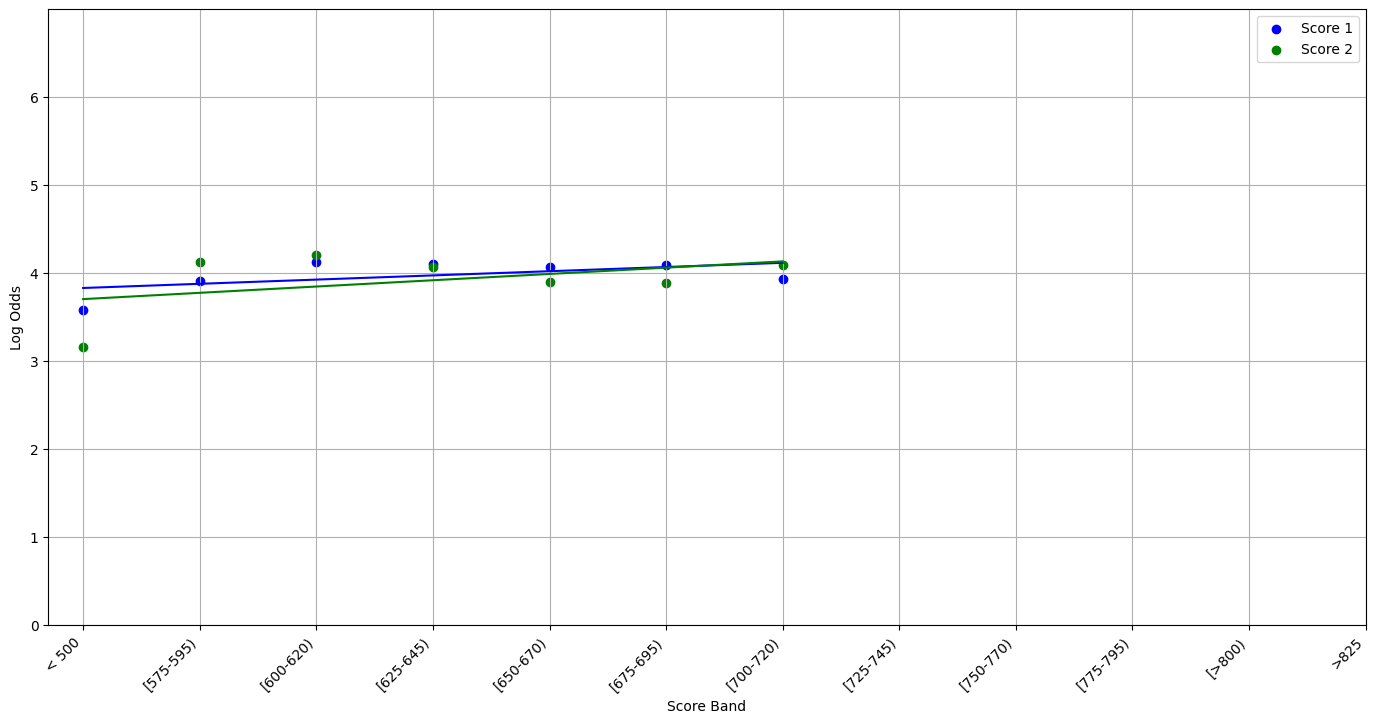

In [47]:
x = question3_df_float.index.codes.astype(float)
y1 = question3_df_float['log_odds_s1']
y2 = question3_df_float['log_odds_s2']


# Calculate the coefficients for the lines of best fit for each set of data
coeffs1 = np.polyfit(x, y1, 1)
coeffs2 = np.polyfit(x, y2, 1)

# Create functions for each line of best fit based on the calculated coefficients
line1 = np.poly1d(coeffs1)
line2 = np.poly1d(coeffs2)

#finding b0 and b1 from np polyfit
b1_line1, b0_line1 = line1.coef
b1_line2, b0_line2 = line2.coef

# Plot the scatter points for both sets of data
plt.scatter(x, y1, label='Score 1', color="blue")
plt.scatter(x, y2, label='Score 2', color="green")

# Plot each line of best fit
plt.plot(x, line1(x), color="blue")
plt.plot(x, line2(x), color="green")

#Creating string list of the score bands along with their positions on x-axis
string_list = [f"<{i}" if i<500 else f"{i}-{i+20}" if i<800 else f">{i}" for i in range(575, 850, 25)]
string_list.insert(0, "< 500")
#Adding [ ) to the x ticks 
for i in range(len(string_list)):
    if i != 0 and i != len(string_list) - 1:
        string_list[i] = "[" + string_list[i] + ")"
number_list = [i for i in range(0, 12)]

# Add a legend and labels for the axes
plt.legend()
plt.xlabel('Score Band')
plt.ylabel('Log Odds')
plt.ylim(0, 7)
plt.yticks(range(0, 7))
plt.xticks(number_list, string_list, rotation=45, ha='right')
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(17,8)

# Show the plot
plt.show()


In [ ]:
#Getting various stats of each score
def get_stats(independent, dependent, score): 
  slope, intercept, r_value, p_value, std_err = stats.linregress(independent, dependent)
  print("\033[4m" + score + "\033[0m")
  print("Slope:", slope)
  print("Intercept:", intercept)
  print("R-squared:", r_value**2)
  print("P-value:", p_value)
  print("std err:", std_err)
  print("\n")

get_stats(x, y1, "Score 1")
get_stats(x, y2, "Score 2")

In [ ]:
#Getting rmse and mse of each score while creating predicted arrays comparing with true arrays for these computations
y1_new = line1(np.array(y1))
y2_new = line2(np.array(y2))

def get_rmse(true, pred, score):
  print("\033[4m" + score + "\033[0m")
  mse = mean_squared_error(true, pred)
  print("MSE: ", mse)
  rmse = np.sqrt(mse)
  print("RMSE: ", rmse)
  print("\n")


get_rmse(y1, y1_new, "Score 1")
get_rmse(y2, y2_new, "Score 2")

In [ ]:
#organizing data for table, calculate PDO which is the natural logarithm of base 2 / beta 1's for each score 
table_data = [['Variable', 'Score 1', 'Score 2'],
        ['Intercept β0', round(b0_line1, 2), round(b0_line2, 2)],
        ['Coefficient β1', round(b1_line1, 2), round(b1_line2, 2)],
        ['PDO', round(math.log(2)/b1_line1, 2), round(math.log(2)/b1_line2, 2)]]

# set the colors for the table
colors = [['green'] * 3]  # set top row to light gray
for i in range(1, len(table_data)):
    colors.append(['w'] * 3)  # set all other rows to white

# create the table plot
fig, ax = plt.subplots()
ax.axis('off')  # remove axes

# plot the table using table function
table = ax.table(cellText=table_data, cellColours=colors, loc='center')

# set table properties
table.set_fontsize(14)
table.scale(1, 2)  # set table size

# display the plot
plt.show()



Question 4

In [ ]:
#Rename for ease of use for this function
x = question3_df_float.index.codes.astype(float)
y1 = question3_df_float['log_odds_s1']
y2 = question3_df_float['log_odds_s2']

#create function which prints beta 0 and beta 1 for each score
def calculate_betas(x, y, score):
  X_mean = sum(x) / len(x)
  Y_mean = sum(y) / len(y)

  dev_X = [i - X_mean for i in x]
  dev_Y = [j - Y_mean for j in y]

  SS_xy = sum([dev_X[i] * dev_Y[i] for i in range(len(x))])
  SS_xx = sum([(j - X_mean)**2 for j in x])

  beta1 = SS_xy / SS_xx
  beta0 = Y_mean - beta1 * X_mean

  print("\033[4m" + score + "\033[0m", ": β0 =", round(beta0, 2), "and β1 =", round(beta1, 2))
  print("\n")

calculate_betas(x, y1, "Score 1")
calculate_betas(x, y2, "Score 2")


Question 5

Based on the questions above, I believe the divergence measure indicates how well-separated the two groups are based on their means and variances. A larger divergence value indicates that the two groups are more distinct and easier to separate, while a smaller value indicates that the two groups are more similar and harder to separate. It's worth noting that the divergence measure is just one of many possible measures of separation between two groups. Other measures, such as Cohen's d score is a standardized effect size measure that compares the means of two sets of variables. It expresses the difference between the means in terms of standard deviations, which makes it easier to compare effect sizes across different studies. Additionally, we could look at The Mahalanobis distance, which is a measure of the distance between two sets of variables that considers the correlation between the variables. It is useful when the variables are highly correlated and the differences between the sets of variables are complex.

Moreover, I believe PDO value indicates the time it takes for a value to decrease by half. As the formula for PDO equals (ln(2) / beta 1), in this particular case, the PDO value indicates the time it takes for the value of beta1 to decrease to half. Some precautions which must be realised when using the PDO value is that it's dependent on the growth conditions of the data. Changes in these conditions can significantly affect the growth rate and PDO value, making it difficult to compare results from different experiments. Additional tests that could be implemented when looking for the half-life in a decay process include, Exponential regression which can be used to model the decay process and estimate the rate of decay, The chi-squared test which can be used to test whether the observed data fits an exponential decay model, Maximum likelihood estimation which can be used to estimate the parameters of an exponential decay model, and finally Nonlinear regression which can be used to fit an exponential decay model to the data and estimate the half-life.
